<a href="https://colab.research.google.com/github/jehasbani/predicting-the-likelihood-of-e-signing-a-loan-based-on-financial-history/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the likelihood of e-signing a loan based on financial history

## Introduction

Lending companies work by analyzing the financial history of their loan applicants, and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement campaigns. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leads of possible applicants. Some example marketplaces include Upstart, Lending Tree, and Lending club. In this project, we are going to asses the quality of the leads our company receives from these marketplaces. 

* **Market**: The target audience is the set of loan applicants who reached out through an intermediary marketplace.

* **Product**: A loan.

* **Goal**: To develop a model to predict for quality applicants. In this case study, quality applicants are those who reach a key part of the loan application process.

### Business Challenge

In this Case Study we will be working for a fintech company that specializes on loans, It offers low APR loans to applicants based on their financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). The numbers of conversions from these leads are satisfactory.

The company tasks you with creating a model that predicts whether or not these leads will complete the electronic signature phase of the loan application (a.k.a. e_signed). The company seeks to leverage this model to identify less quality applicants (e.g. those who are not responding to the onboarding process), and experiment with giving them different onboarding screens.

The reason for selecting the e_signing process as the response variable is due to the structure of the loan application. The official application begins with the lead arriving into our website after we opted to acquire it. Here, the applicant begins the onboarding process to apply for a loan. The user begins to provide more financial information by going over every screen of the onboarding process. This first phase ends with the applicant providing his/her signature indicating all of the given information is correct. 

Any of the following screens, in which the applicant is approved/denied and given the terms of the loan, is dependent on the company, not the applicant. Therefore the effectiveness of the onboarding is measured up to the moment the applicant stops having control of the application process.

### Data

Because the applicants arrived through a marketplace, we have access to their financial data before the onboarding process begins. This data includes personal information like age, and time employed, as well as other financial metrics. Our company utilizes these financial data points to create risk scores based on many different risk factors.

In this case study, we are given the set of scores from algorithms built by the finance and engineering teams. Furthermore, the marketplace itself provides us with their own lead quality scores. We will leverage both sets of scores, as well as small list of personal/financial features to predict if the user is likely to respond to our current onboarding process.

---
## Exploratory data analysis

### Importing libraries and uploading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Practical: 6 Real-World Applications/05 - Predicting the likelihood of e-signing a loan based on financial history/data'

In [ ]:
df = pd.read_csv(os.path.join(data_path,'financial_data.csv'))

In [ ]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


Let's give a quick description of each column:

* entry_id: Id of the application for a loan.
* age: Age of the applicant (>=18)
* pay_schedule: How often the applicant gets paid.
* home_owner: Whether the applicant is a home owner.
* income: How much the applicant gets paid.
* months_employed and years_employed: Together they indicate how long the applicant has been employed (i.e X years and Y months)
* current_address_year: How many years the applicant has stayed at the current address.
* personal_account_m and personal_account_y: How long the applicant has had their personal account.
* has_debt: Whether the applicant has debt.
* amount_requested: The amount of money requested in the loan.
* risk_score, risk_score_2, risk_score_3, risk_score_4 and risk_score_5: The financial risk scores for the applicant that indicate the likelihood of payment.
* ext_quality_score, ext_quality_score_2: P2P marketplace quality score.
* inquiries_last_month: How many inquries has had in the last month.
* e_signed: Whether the applicant has completed the e-signing process. Target variable.

### Data exploration
Now let's see a description of the numerical variables:

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [ ]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


As primary takeaway from the description of the dataset we can see that there are no missing values and that the `e-signed` mean is 53.8%, which indicates a fairly balanced dataset with respect to the target variable. Also, most of the variables have very different means and std, so we'll probably standardize them later.

### Histograms

In [ ]:
df_numerical = df.drop(columns = ['entry_id','pay_schedule','e_signed'])

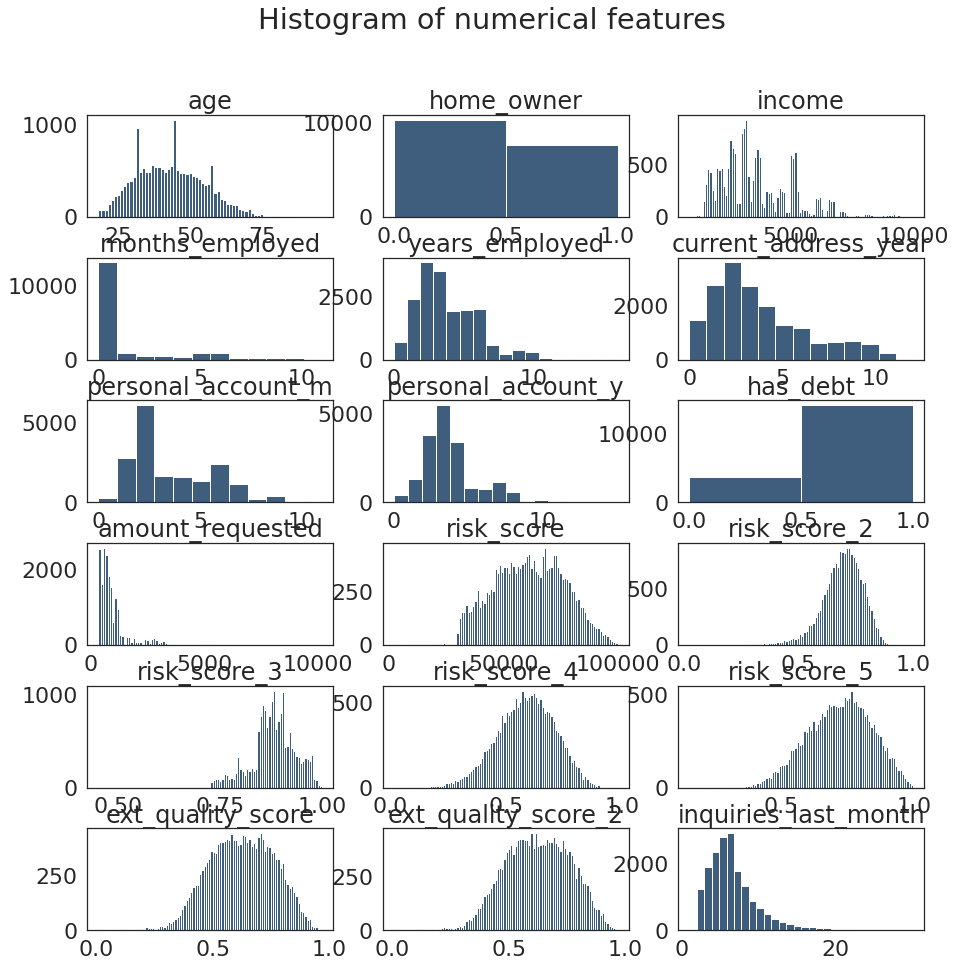

In [ ]:
fig,axes = plt.subplots(6,3, figsize=(15,15))

axes = axes.ravel()
for ax in axes:
  ax.set_axis_off()

plt.suptitle('Histogram of numerical features')
for i,col in enumerate(df_numerical.columns):
  axes[i].set_title(col)

  vals = np.size(df_numerical[col].unique())
  #put a limit to vals to make sure that there are no more than 100 bins (for computing efficiency)
  if vals >= 100:
    vals = 100
  
  axes[i].hist(df_numerical[col].values, bins = vals, color = '#3f5d7d')
  axes[i].set_axis_on()

plt.subplots_adjust(hspace=0.4)

We can see that age and most of the score columns have follow a normal distribution. `home_owner` shows a pretty balanced binary distribution, while `has_debt` lets us know that most of the applicants have debts. `income` presents a spiky distribution but tracing an imaginary enveloping trend line, it would look Gaussian. `amount_requested` is right-tailed, which means that most people tend to ask for smaller amounts in their loan applications. `inquiries_last_month` is right-tailed as well which could mean that most people have fewer doubts about the process. 

In the case of `months_employed` we notice that the majority of the values are 0, which is counterintuitive because people do not often work an exact time (i.e. 2 years, 3 years). In reality, this time looks more like 1 year and 8 months. So, this is an indication that perhaps the data in this columns is not so precise.

---
### Correlation with target plot

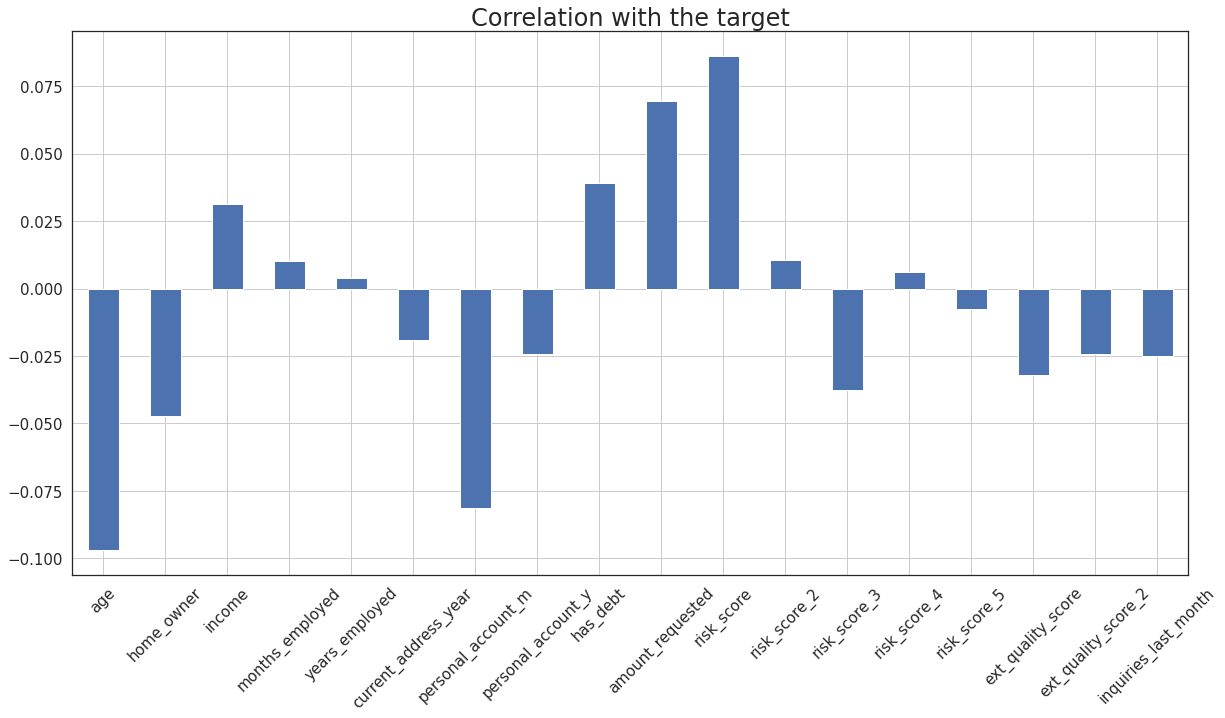

In [ ]:
df_numerical.corrwith(df.e_signed).plot.bar(
    figsize=(20,10),
    title='Correlation with the target',
    fontsize=15,
    rot=45,
    grid=True
)
plt.show()

The constraints of the correlations values are approximately -0.1 and 0.075 which, in terms of correlation weight, are not very high values. We may try to draw some conclusions for educational purposes only, but we can clearly see that there is not a strong correlation between any of the variables and the target.

---
### Correlation Matrix

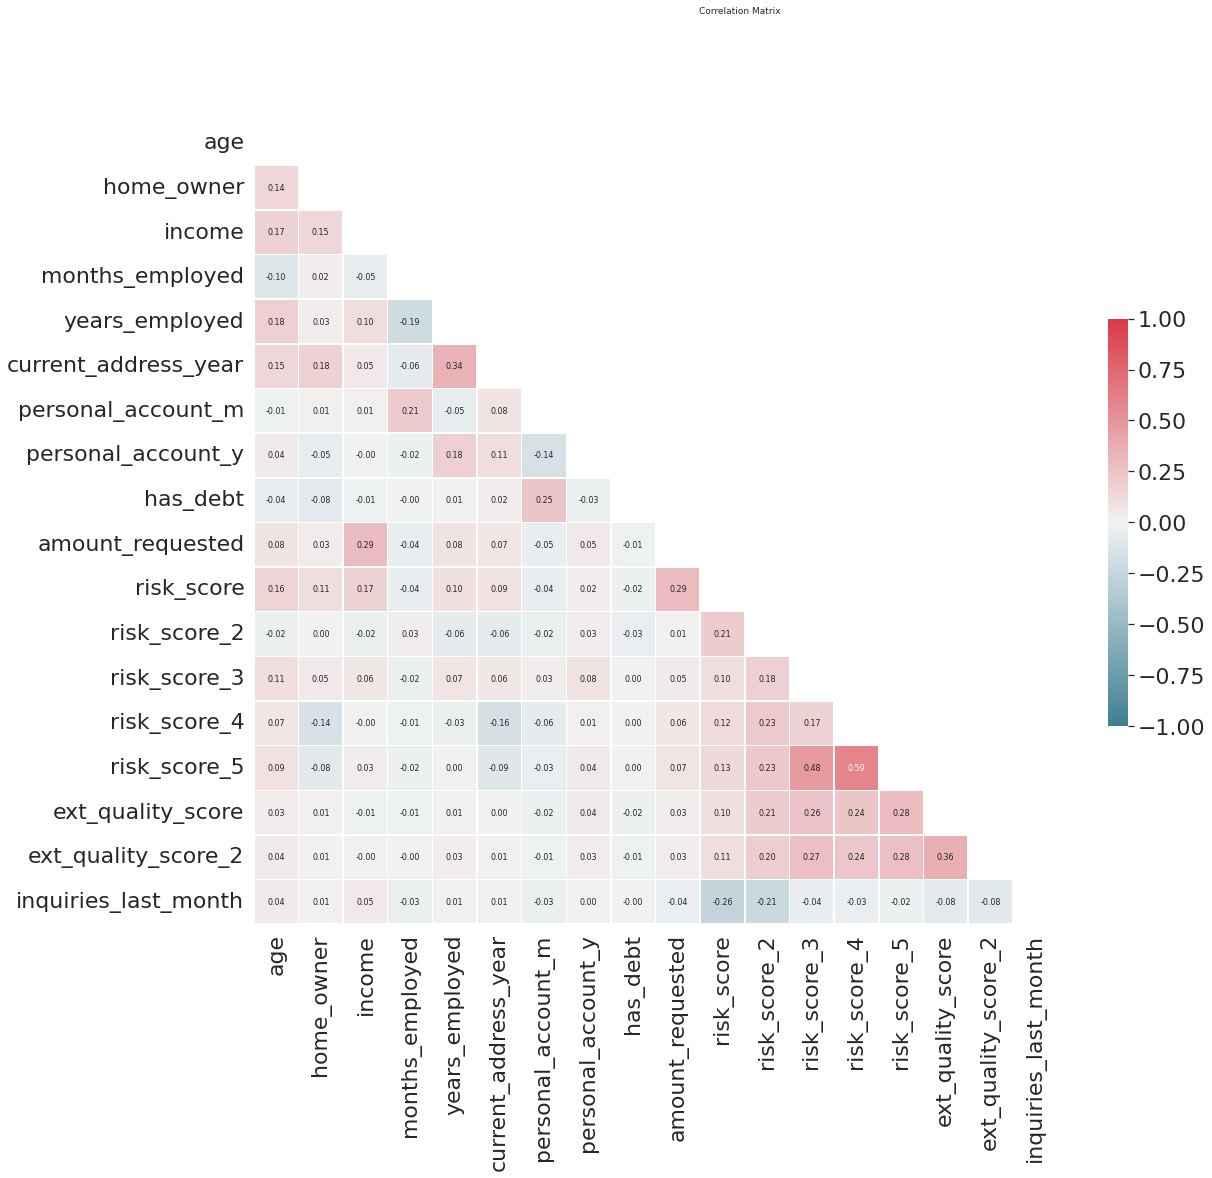

In [ ]:
corr = df_numerical.corr() 
sns.set(style='white',font_scale=2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix", fontsize=9)

# generate a colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr,
            mask=mask,
            cmap=cmap, 
            vmax=1, vmin = -1, 
            center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink":0.5},
            annot=True,
            annot_kws={"fontsize":8},
            fmt='.2f')
plt.show()

The columns are not correlated, as the strongest corrlation value we find is 0.59, which is lower than the rule-of-thumb threshold of 0.7 to consider to features to be considerably correlated. 

---
## Data Preprocessing

In [ ]:
import random
import time

In [ ]:
random.seed(100)

### Feature Engineering

We can start by dropping the `months_employed` column, which we found to be having wrong data.

In [ ]:
df.drop(columns=['months_employed'],inplace=True)

Next, we can combine the `personal_account_m` and `personal_account_y` into a new column:

In [ ]:
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y * 12))

In [ ]:
df[['personal_account_m','personal_account_y','personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [ ]:
df.drop(columns=['personal_account_m','personal_account_y'], inplace=True)

### One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, drop_first=True)

We set the `drop_first` field to True because `pandas.get_dummies` yields one column per value of the categorical column. We need to drop one of the generated columns because otherwise the dummy columns would not be independent.

Visit this [link](https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable) for more information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   entry_id                   17908 non-null  int64  
 1   age                        17908 non-null  int64  
 2   home_owner                 17908 non-null  int64  
 3   income                     17908 non-null  int64  
 4   years_employed             17908 non-null  int64  
 5   current_address_year       17908 non-null  int64  
 6   has_debt                   17908 non-null  int64  
 7   amount_requested           17908 non-null  int64  
 8   risk_score                 17908 non-null  int64  
 9   risk_score_2               17908 non-null  float64
 10  risk_score_3               17908 non-null  float64
 11  risk_score_4               17908 non-null  float64
 12  risk_score_5               17908 non-null  float64
 13  ext_quality_score          17908 non-null  flo

Now we can get rid of the columns that will not be used for the model training:

In [ ]:
y = df.e_signed
users = df.entry_id
X = df.drop(columns=['entry_id','e_signed'])

### Train-Test Split
Next, we can split the data into a train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature scaling

We'll be scaling only the numerical features and leave the categorical features as they are since they don't follow a normal distribution and applying the scaler to such columns could lead to undesirable results that affect the process of learning.

In [ ]:
num_cols = ['age','income','years_employed','current_address_year',
            'amount_requested','risk_score','risk_score_2','risk_score_3','risk_score_4','risk_score_5',
            'ext_quality_score','ext_quality_score_2','inquiries_last_month','personal_account_months']

binary_columns = [col for col in X_train.columns if col not in num_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([
        ('scaler', StandardScaler(), num_cols),
        ('minmax',MinMaxScaler(),binary_columns)
    ], remainder='passthrough')

X_train_sc = pd.DataFrame(ct.fit_transform(X_train),columns=num_cols + binary_columns,index=X_train.index)

In [ ]:
X_test_sc = pd.DataFrame(ct.transform(X_test),columns=num_cols + binary_columns)

---
## Model Selection

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, penalty='l1',solver='saga')

In [ ]:
clf.fit(X_train_sc,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [ ]:
y_pred = clf.predict(X_test_sc) 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

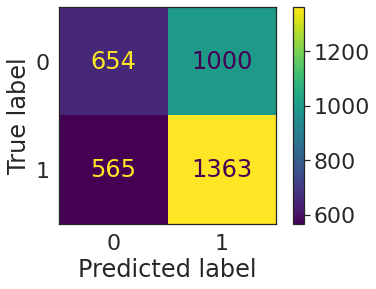

Accuracy: 0.5631
Precision: 0.5768
Recall: 0.7070
F1: 0.6353


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}") 
print(f"F1: {f1:.4f}")

In [ ]:
results = pd.DataFrame([["Logistic Regression (Lasso)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

### Support Vector Machine - Linear

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(random_state=0, kernel='linear')

In [ ]:
clf.fit(X_train_sc,y_train)
y_pred = clf.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([["SVM (linear)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Lasso),0.563093,0.576809,0.706950,0.635283
1,SVM (linear),0.568118,0.577597,0.735477,0.647045


### Support Vector Machine - RBF

In [ ]:
clf = SVC(random_state=0, kernel='rbf')

In [ ]:
clf.fit(X_train_sc,y_train)
y_pred = clf.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([["SVM (rbf)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Lasso),0.563093,0.576809,0.706950,0.635283
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.599107,0.610116,0.706950,0.654974


### Random Forest (100 trees)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state=0, n_estimators=100, criterion='entropy')

In [ ]:
clf.fit(X_train_sc,y_train)
y_pred = clf.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([["Random Forest (n=100)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Lasso),0.563093,0.576809,0.706950,0.635283
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.599107,0.610116,0.706950,0.654974
3,Random Forest (n=100),0.627303,0.647586,0.674793,0.660909


We can see that the better performing model is Random Forest, so we are going to perform 10-fold CV on it:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc_scores = cross_val_score(estimator = clf, X=X_train_sc, y=y_train, cv=10)
print(f"Random Forest accuracy: {cv_acc_scores.mean():.4f} (+/- {cv_acc_scores.std()*2:.4f})")

Random Forest accuracy: 0.6269 (+/- 0.0297)


This results tells us that RF is consistent throughout the entire dataset and confirms that it's the best model in this case.

---
## HyperParameter Tuning

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Entropy: Round 1

In [ ]:
parameters = {'max_depth': [3,None],
              'max_features': [1,5,10],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10],
              'bootstrap': [True,False],
              'criterion': ["entropy"]}

In [ ]:
grid_search = RandomizedSearchCV(estimator=clf, 
                                 param_distributions=parameters,
                                 scoring='accuracy',
                                 cv = 10,
                                 n_jobs=-1)

In [ ]:
t0 = time.time()
grid_search.fit(X_train_sc,y_train)
t1 = time.time()
print(f"Took {t1-t0:.2f} seconds")

Took 318.90 seconds


In [ ]:
grid_search.best_score_

0.6380721091432202

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

#### Entropy: Round 2

In [ ]:
parameters = {'max_depth': [None],
              'max_features': [8,10,12],
              'min_samples_split': [8,10,12],
              'min_samples_leaf': [1,2,3],
              'bootstrap': [True],
              'criterion': ["entropy"]}

In [ ]:
grid_search = RandomizedSearchCV(estimator=clf, 
                                 param_distributions=parameters,
                                 scoring='accuracy',
                                 cv = 10,
                                 n_jobs=-1)

In [ ]:
t0 = time.time()
grid_search.fit(X_train_sc,y_train)
t1 = time.time()
print(f"Took {t1-t0:.2f} seconds")

Took 1076.51 seconds


In [ ]:
grid_search.best_score_

0.6338846503214338

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 12}

In [ ]:
y_pred = grid_search.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([["Random Forest (n=100, GSx2 + Entropy)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Lasso),0.563093,0.576809,0.706950,0.635283
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.599107,0.610116,0.706950,0.654974
3,Random Forest (n=100),0.627303,0.647586,0.674793,0.660909
4,"Random Forest (n=100, GSx2 + Entropy)",0.630653,0.644806,0.698651,0.670650


#### Gini: Round 1

In [ ]:
parameters = {'max_depth': [3,None],
              'max_features': [1,5,10],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10],
              'bootstrap': [True,False],
              'criterion': ["gini"]}

In [ ]:
grid_search = RandomizedSearchCV(estimator=clf, 
                                 param_distributions=parameters,
                                 scoring='accuracy',
                                 cv = 10,
                                 n_jobs=-1)

In [ ]:
t0 = time.time()
grid_search.fit(X_train_sc,y_train)
t1 = time.time()
print(f"Took {t1-t0:.2f} seconds")

Took 268.02 seconds


In [ ]:
grid_search.best_score_

0.6343042782458179

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

#### Gini: Round 2

In [ ]:
parameters = {'max_depth': [None],
              'max_features': [3,5,7],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [3,5,7],
              'bootstrap': [True],
              'criterion': ["gini"]}

In [ ]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv = 10,
                           n_jobs=-1)

In [ ]:
t0 = time.time()
grid_search.fit(X_train_sc,y_train)
t1 = time.time()
print(f"Took {t1-t0:.2f} seconds")

Took 841.18 seconds


In [ ]:
grid_search.best_score_

0.6345834129283022

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [ ]:
y_pred = grid_search.predict(X_test_sc) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([["Random Forest (n=100, GSx2 + Gini)", accuracy,precision,recall,f1]],
             columns=["Model","Accuracy","Precision","Recall","F1-Score"])

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Lasso),0.563093,0.576809,0.706950,0.635283
1,SVM (linear),0.568118,0.577597,0.735477,0.647045
2,SVM (rbf),0.599107,0.610116,0.706950,0.654974
3,Random Forest (n=100),0.627303,0.647586,0.674793,0.660909
4,"Random Forest (n=100, GSx2 + Gini)",0.627862,0.641330,0.700207,0.669477


As we can see after comparing the performance of the various models we've trained, the best performance was obtaind by Random Forest (n=100, GSx2 + Entropy) with the best hyperparameters found through randomized search. So we'll stick to it to present the final results.

## Formatting the results

In [ ]:
final_results = pd.concat([users,y_test], axis = 1).dropna()

In [ ]:
final_clf = RandomForestClassifier(n_estimators=100, 
                                   criterion='entropy',
                                   max_depth = None,
                                   max_features = 12,
                                   min_samples_leaf = 3,
                                   min_samples_split = 12)

final_clf.fit(X_train_sc,y_train)
y_pred = final_clf.predict(X_test_sc)

In [ ]:
cv_acc_scores = cross_val_score(estimator = final_clf, X=X_train_sc, y=y_train, cv=10)
print(f"Random Forest accuracy: {cv_acc_scores.mean():.4f} (+/- {cv_acc_scores.std()*2:.4f})")

Random Forest accuracy: 0.6321 (+/- 0.0191)


In [ ]:
final_results['predictions'] = y_pred

In [ ]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,0


---
## Conclusion

Our model has given us an accuracy of around 64%. With this, we have an algorithm that can help predict whether or not a user will complete the E-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customized onboarding. This means that when a lead arrives from the marketplace, they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimize how many people drop off from the funnel. This funnel of screens is as effective as we, as a company, build it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted to not finish the process to complete the e-sign step. If we can do this, then we can drastically increase profits. Many lending companies provide hundreds of loans every day, gaining money for each one. As a result, if we can increase the number of loan takers, we are increasing profits. All with a simple model!